In [1]:
from simulation import Simulation
from augmentation_pipeline import AugmentationPipeline

import random
import numpy as np
import matplotlib.pyplot as plt

# Important for animation to run inline
%matplotlib ipympl

# Load data

In [3]:
number_grids = 64
save_folder = "../data/raw_datasets"
sim = 42

topo = np.loadtxt(f"{save_folder}\\DEM\\DEM_{sim}.txt")[:, 2].reshape(number_grids,number_grids)
wd = np.loadtxt(f"{save_folder}\\WD\\WD_{sim}.txt").reshape(-1,number_grids,number_grids)
vx = np.loadtxt(f"{save_folder}\\VX\\VX_{sim}.txt").reshape(-1,number_grids,number_grids)
vy = np.loadtxt(f"{save_folder}\\vy\\vy_{sim}.txt").reshape(-1,number_grids,number_grids)

test_sim = Simulation(topo, wd, vx, vy)

### First, we test some individual operations

In [4]:
fix, axs = plt.subplots(1,4)
axs[0].imshow(topo, cmap="terrain")

# Horizontal flip
topo_aug = topo[:, ::-1]
axs[1].imshow(topo_aug, cmap="terrain")

# Vertical flip
topo_aug = topo[::-1, :]
axs[2].imshow(topo_aug, cmap="terrain")

# 90 deg
rot = 90
topo_aug = topo
for i in range(rot//90):
    topo_aug = np.rot90(topo_aug, -1)
axs[3].imshow(topo_aug, cmap="terrain")

# # Remove to show the plots
plt.close()

No such comm: 36c9f15c30e34efcac0dc97d31323f39


### Second, test entire pipeline

In [5]:
test_pipeline = AugmentationPipeline()

aug_sim = test_pipeline.transform_simulation(test_sim)

Horizontal flip:	0 
Vertical flip:		0 
Rotation angle:		270


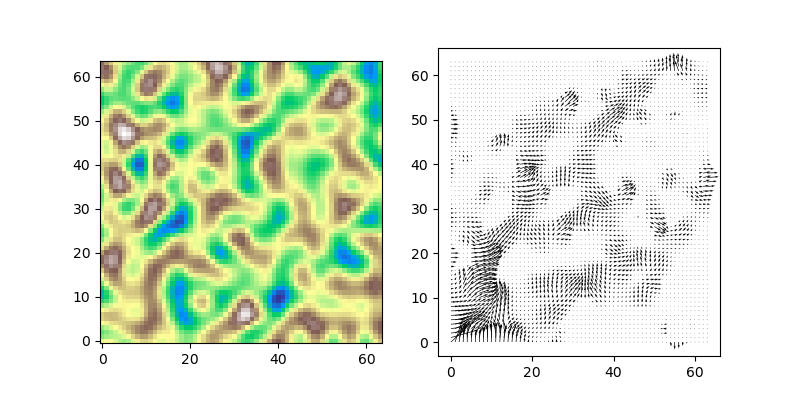

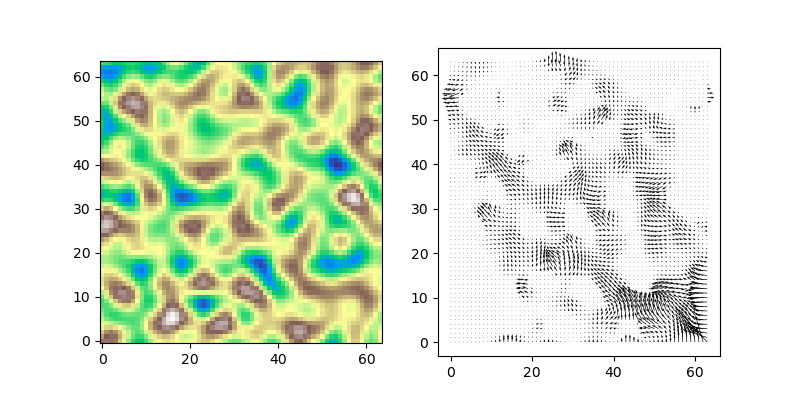

In [6]:
# Test vector plot
fig = test_sim.plot_vector(-1)
fig = aug_sim.plot_vector(-1)

print(test_pipeline)

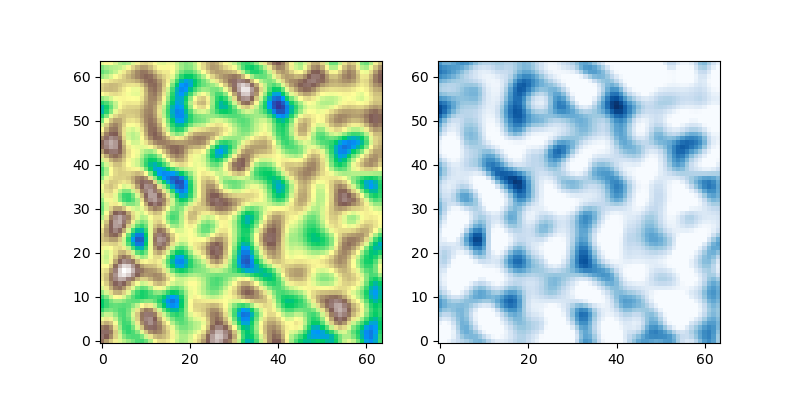

In [10]:
# Test animation
ani = aug_sim.plot_animation()